In [1]:
from dolfin import *
#Meshandfunctionspace
import matplotlib.pyplot as plt
import numpy as np
import GenerateData as gd
import gmsh

In [2]:
!dolfin-convert data/mesh/DD.msh data/mesh/DD.xml

Converting from Gmsh format (.msh, .gmsh) to DOLFIN XML format
Expecting 161 vertices
Found all vertices
Expecting 270 cells
Found all cells
Conversion done


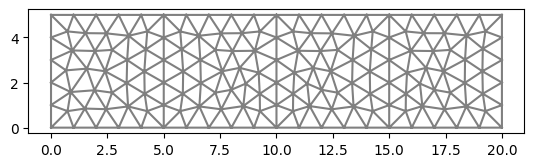

In [3]:
mesh_load = gd.MeshLoader("data/mesh/DD")
mesh = mesh_load.mesh
bounds = mesh_load.bounds
face = mesh_load.face
plot(mesh)

In [4]:
idx = np.where(mesh.coordinates()[:,1] < 3)[0]#and mesh.coordinates()[:,1].any() > 2 )[0]
idx2 = np.where(mesh.coordinates()[:,1] > 2)[0]
idx

array([  0,   2,   4,   6,   8,  10,  11,  12,  13,  18,  19,  20,  21,
        26,  27,  28,  29,  34,  35,  36,  37,  42,  43,  44,  46,  47,
        48,  50,  51,  52,  54,  55,  56,  58,  59,  60,  62,  63,  65,
        66,  67,  69,  70,  75,  76,  77,  79,  81,  83,  84,  86,  88,
        89,  90,  91,  93,  94,  99, 100, 102, 103, 106, 107, 109, 110,
       111, 113, 114, 115, 116, 118, 119, 124, 125, 127, 128, 131, 132,
       134, 135, 136, 137, 139, 140, 141, 143, 144, 148, 150, 152, 153,
       155, 157, 159, 160])

In [5]:
elementi_comuni = np.intersect1d(idx, idx2)

# Stampa gli elementi comuni
print(elementi_comuni)

[ 44  48  52  56  60  62  63  69  79  88  89  93 103 113 114 118 128 136
 137 143 153]


In [6]:
tags = {'walls':[5,6,7], 'interface': [8,9,10], 'faces': [11,12,13,14]}
mesh_load.update_tags(tags)
mesh_load.measure_definition()

(Measure('interior_facet', subdomain_id='everywhere', domain=Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 0), subdomain_data=<dolfin.cpp.mesh.MeshFunctionSizet object at 0x7fe07509c6f0>),
 Measure('exterior_facet', subdomain_id='everywhere', domain=Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 0), subdomain_data=<dolfin.cpp.mesh.MeshFunctionSizet object at 0x7fe07509c6f0>),
 Measure('cell', subdomain_id='everywhere', domain=Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 0), subdomain_data=<dolfin.cpp.mesh.MeshFunctionSizet object at 0x7fe035ee25b0>))

Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.


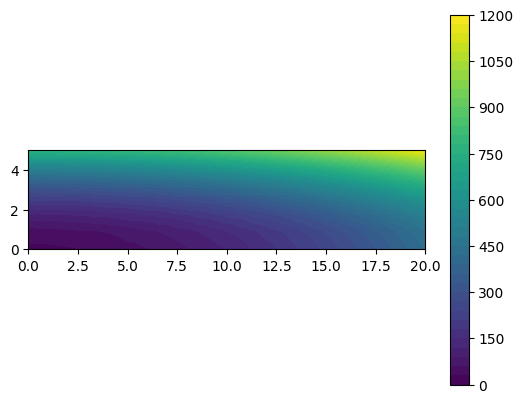

In [7]:
heat = gd.Heat(mesh_load,'Heat')
heat.solve()
heat.plot_solution()

In [8]:
data = gd.DataHeat(heat,mesh_load)
flux = data.flux(tags['interface'][0])
print(flux)

Calling FFC just-in-time (JIT) compiler, this may take some time.
-84.14719033136367


In [9]:
assemble(Constant(1.0)*mesh_load.dx(tags['faces'][1]))

Calling FFC just-in-time (JIT) compiler, this may take some time.


25.0

In [10]:
mean = data.mean_temp(tags['faces'][0])
print(mean)

Calling FFC just-in-time (JIT) compiler, this may take some time.
284.6061409087661


Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational p

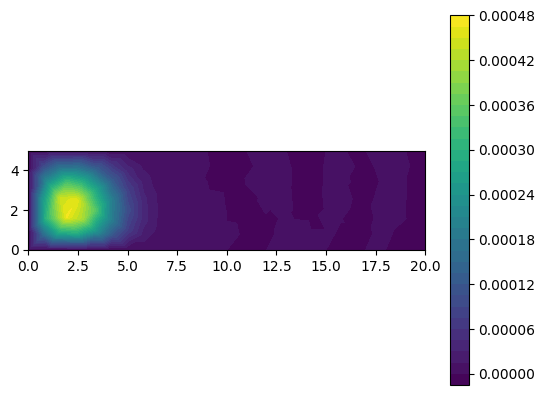

In [11]:
# diffusion of a gaussian function
heat_gaussian = gd.Heat(mesh_load,'Heat')
V = FunctionSpace(mesh_load.mesh,"CG",1)
k = Constant(1.0)
f = Constant(0.0)
bc = Constant(0.0)
u0 = Expression('exp(-a*pow(x[0], 2) - a*pow(x[1], 2))',degree=2, a=5)
dt = 2.0/ 50
T = 2.0
heat_gaussian.set_parameters(V,k,f,bc,u0,dt,T)
heat_gaussian.solve()
heat_gaussian.plot_solution()

In [12]:
center_line = []
for i in tags['interface']:
    edge_coord =[]
    for edge in edges(mesh):
        if bounds.array()[edge.index()] == i:
            for vertex in vertices(edge):
                coordinate = vertex.point().array()
                edge_coord.append(coordinate)

    edge_coord = np.array(edge_coord)
    center_line.append([(np.max(edge_coord[:,0])+np.min(edge_coord[:,0]))/2,(np.max(edge_coord[:,1])+np.min(edge_coord[:,1]))/2])

print(center_line)

[[5.0, 2.5], [10.0, 2.5], [15.0, 2.5]]
